In [1]:
import pandas as pd

In [2]:
hous = pd.read_csv('USA_Housing.csv')

In [3]:
hous.head()

Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0      79545.458574             5.682861                   7.009188   
1      79248.642455             6.002900                   6.730821   
2      61287.067179             5.865890                   8.512727   
3      63345.240046             7.188236                   5.586729   
4      59982.197226             5.040555                   7.839388   

   Avg. Area Number of Bedrooms  Area Population         Price  \
0                          4.09     23086.800503  1.059034e+06   
1                          3.09     40173.072174  1.505891e+06   
2                          5.13     36882.159400  1.058988e+06   
3                          3.26     34310.242831  1.260617e+06   
4                          4.23     26354.109472  6.309435e+05   

                                             Address  
0  208 Michael Ferry Apt. 674\nLaurabury, NE 3701...  
1  188 Johnson Views Suite 079\nLake Kathleen, CA...  
2  9127 Elizabeth Stravenue\nDanieltown, WI 06482...  
3                          USS Barnett\nFPO AP 44820  
4                         USNS Raymond\nFPO AE 09386

In [4]:
hous.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [5]:
hous.drop('Address',axis=1,inplace=True)

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('darkgrid')

No handles with labels found to put in legend.


<Figure size 864x504 with 0 Axes>

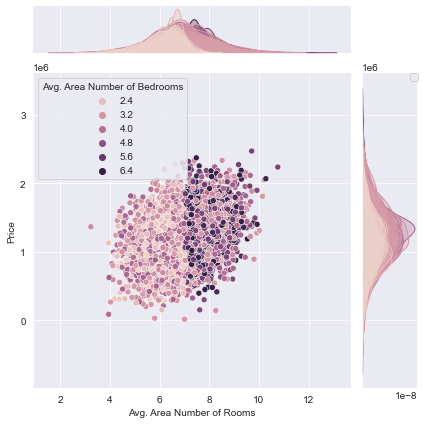

In [7]:
plt.figure(figsize=(12,7))
sns.jointplot(x='Avg. Area Number of Rooms',y='Price',
             data=hous,hue='Avg. Area Number of Bedrooms')

plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
plt.tight_layout()

In [8]:
hous.head()

Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0      79545.458574             5.682861                   7.009188   
1      79248.642455             6.002900                   6.730821   
2      61287.067179             5.865890                   8.512727   
3      63345.240046             7.188236                   5.586729   
4      59982.197226             5.040555                   7.839388   

   Avg. Area Number of Bedrooms  Area Population         Price  
0                          4.09     23086.800503  1.059034e+06  
1                          3.09     40173.072174  1.505891e+06  
2                          5.13     36882.159400  1.058988e+06  
3                          3.26     34310.242831  1.260617e+06  
4                          4.23     26354.109472  6.309435e+05

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X = hous.drop('Price',axis=1)

y = hous['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
lnn = LinearRegression()

In [13]:
lnn.fit(X_train,y_train)

LinearRegression()

In [14]:
from sklearn.metrics import classification_report,confusion_matrix

In [15]:
prediction = lnn.predict(X_test)

In [16]:
print(lnn.intercept_)

-2638673.426190582


In [17]:
lnn.coef_

array([2.16257989e+01, 1.65590393e+05, 1.19827783e+05, 2.36109526e+03,
       1.52165814e+01])

In [18]:
pd.DataFrame(lnn.coef_,X_train.columns,columns=['Coeff'])

Coeff
Avg. Area Income                  21.625799
Avg. Area House Age           165590.392746
Avg. Area Number of Rooms     119827.783390
Avg. Area Number of Bedrooms    2361.095262
Area Population                   15.216581

In [19]:
#LOGISTIC REGRESSION

In [20]:
train = pd.read_csv('titanic_train.csv')
train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [21]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [22]:
del train['Name']

<AxesSubplot:>

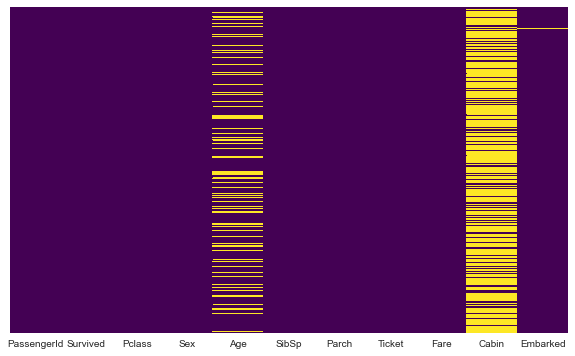

In [23]:
plt.figure(figsize=(10,6))
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

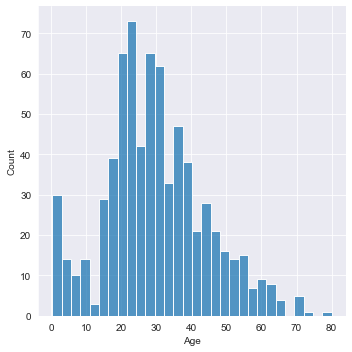

In [24]:
sns.displot(x=train['Age'].dropna(),bins=30)

In [25]:
train['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

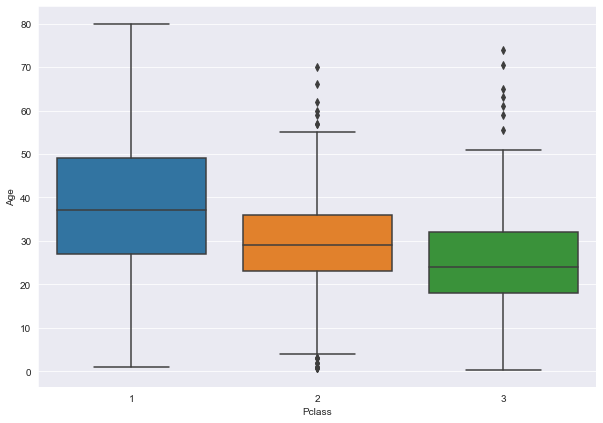

In [26]:
plt.figure(figsize=(10,7))
sns.boxplot(x=train['Pclass'],y=train['Age'])

In [27]:
#JUST TESTING TRAIN TEST SPLIT

In [28]:
import pandas as pd

In [29]:
data = pd.read_csv('titanic_train.csv')
data.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [31]:
del data['Cabin']

In [32]:
data.dropna(inplace=True)

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Name         712 non-null    object 
 4   Sex          712 non-null    object 
 5   Age          712 non-null    float64
 6   SibSp        712 non-null    int64  
 7   Parch        712 non-null    int64  
 8   Ticket       712 non-null    object 
 9   Fare         712 non-null    float64
 10  Embarked     712 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 66.8+ KB


In [34]:
data.head(3)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   

   Parch            Ticket     Fare Embarked  
0      0         A/5 21171   7.2500        S  
1      0          PC 17599  71.2833        C  
2      0  STON/O2. 3101282   7.9250        S

In [35]:
data['Sex'] = data['Sex'].map({'male':0,'female':1})

In [36]:
del data['Name']
del data['Ticket']

In [37]:
data.head(3)

PassengerId  Survived  Pclass  Sex   Age  SibSp  Parch     Fare Embarked
0            1         0       3    0  22.0      1      0   7.2500        S
1            2         1       1    1  38.0      1      0  71.2833        C
2            3         1       3    1  26.0      0      0   7.9250        S

In [38]:
data['Embarked'] = data['Embarked'].map({'S':0,'C':1,'Q':2})

In [39]:
data.head(3)

PassengerId  Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0            1         0       3    0  22.0      1      0   7.2500         0
1            2         1       1    1  38.0      1      0  71.2833         1
2            3         1       3    1  26.0      0      0   7.9250         0

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
X = data.drop('Survived', axis=1)

y = data['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [42]:
X_train

PassengerId  Pclass  Sex    Age  SibSp  Parch     Fare  Embarked
757          758       2    0  18.00      0      0  11.5000         0
310          311       1    1  24.00      0      0  83.1583         1
469          470       3    1   0.75      2      1  19.2583         1
331          332       1    0  45.50      0      0  28.5000         0
752          753       3    0  33.00      0      0   9.5000         0
..           ...     ...  ...    ...    ...    ...      ...       ...
98            99       2    1  34.00      0      1  23.0000         0
753          754       3    0  23.00      0      0   7.8958         0
724          725       1    0  27.00      1      0  53.1000         0
422          423       3    0  29.00      0      0   7.8750         0
663          664       3    0  36.00      0      0   7.4958         0

[498 rows x 8 columns]

In [43]:
X_test

PassengerId  Pclass  Sex   Age  SibSp  Parch      Fare  Embarked
225          226       3    0  22.0      0      0    9.3500         0
449          450       1    0  52.0      0      0   30.5000         0
750          751       2    1   4.0      1      1   23.0000         0
261          262       3    0   3.0      4      2   31.3875         0
283          284       3    0  19.0      0      0    8.0500         0
..           ...     ...  ...   ...    ...    ...       ...       ...
252          253       1    0  62.0      0      0   26.5500         0
800          801       2    0  34.0      0      0   13.0000         0
374          375       3    1   3.0      3      1   21.0750         0
460          461       1    0  48.0      0      0   26.5500         0
195          196       1    1  58.0      0      0  146.5208         1

[214 rows x 8 columns]

In [44]:
y_train

757    0
310    1
469    1
331    0
752    0
      ..
98     1
753    0
724    1
422    0
663    0
Name: Survived, Length: 498, dtype: int64

In [45]:
y_test 

225    0
449    1
750    1
261    1
283    1
      ..
252    0
800    0
374    0
460    1
195    1
Name: Survived, Length: 214, dtype: int64

In [46]:
from sklearn.linear_model import LogisticRegression

In [47]:
logreg = LogisticRegression()

In [48]:
logreg.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [49]:
prediction = logreg.predict(X_test)

In [50]:
prediction

array([0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1], dtype=int64)

In [51]:
from sklearn.metrics import classification_report,confusion_matrix

In [52]:
print(classification_report(prediction,y_test))
print(confusion_matrix(prediction,y_test))

              precision    recall  f1-score   support

           0       0.84      0.80      0.82       134
           1       0.69      0.74      0.71        80

    accuracy                           0.78       214
   macro avg       0.76      0.77      0.76       214
weighted avg       0.78      0.78      0.78       214

[[107  27]
 [ 21  59]]


In [53]:
import pickle

In [54]:
# save the model to disk
filename = 'finalized_model.sav'
pickle.dump(logreg, open(filename, 'wb'))

In [55]:
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

0.7757009345794392


In [56]:
test_data = pd.read_csv('titanic_test.csv')

In [57]:
test_data.head(3)

PassengerId  Pclass                              Name     Sex   Age  SibSp  \
0          892       3                  Kelly, Mr. James    male  34.5      0   
1          893       3  Wilkes, Mrs. James (Ellen Needs)  female  47.0      1   
2          894       2         Myles, Mr. Thomas Francis    male  62.0      0   

   Parch  Ticket    Fare Cabin Embarked  
0      0  330911  7.8292   NaN        Q  
1      0  363272  7.0000   NaN        S  
2      0  240276  9.6875   NaN        Q

In [58]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [59]:
test_data['Embarked'] = test_data['Embarked'].map({'S':0,'C':1,'Q':2})
test_data['Sex'] = test_data['Sex'].map({'male':0,'female':1})

In [60]:
del test_data['Cabin']
del test_data['Name']
del test_data['Ticket']

In [61]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int64  
 3   Age          332 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Fare         417 non-null    float64
 7   Embarked     418 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 26.2 KB


In [62]:
test_data.dropna(inplace=True)

In [63]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 331 entries, 0 to 415
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  331 non-null    int64  
 1   Pclass       331 non-null    int64  
 2   Sex          331 non-null    int64  
 3   Age          331 non-null    float64
 4   SibSp        331 non-null    int64  
 5   Parch        331 non-null    int64  
 6   Fare         331 non-null    float64
 7   Embarked     331 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 23.3 KB


In [64]:
predict = logreg.predict(test_data)

In [65]:
predict

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,

In [66]:
new_survived = pd.Series(predict)

In [67]:
new_survived.isna().any()

False

In [68]:
test_data['New_predicted_survived'] = predict

In [69]:
test_data

PassengerId  Pclass  Sex   Age  SibSp  Parch      Fare  Embarked  \
0            892       3    0  34.5      0      0    7.8292         2   
1            893       3    1  47.0      1      0    7.0000         0   
2            894       2    0  62.0      0      0    9.6875         2   
3            895       3    0  27.0      0      0    8.6625         0   
4            896       3    1  22.0      1      1   12.2875         0   
..           ...     ...  ...   ...    ...    ...       ...       ...   
409         1301       3    1   3.0      1      1   13.7750         0   
411         1303       1    1  37.0      1      0   90.0000         2   
412         1304       3    1  28.0      0      0    7.7750         0   
414         1306       1    1  39.0      0      0  108.9000         1   
415         1307       3    0  38.5      0      0    7.2500         0   

     New_predicted_survived  
0                         0  
1                         0  
2                         0  
3                         0  
4                         1  
..                      ...  
409                       1  
411                       1  
412                       1  
414                       1  
415                       0  

[331 rows x 9 columns]

In [70]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 331 entries, 0 to 415
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PassengerId             331 non-null    int64  
 1   Pclass                  331 non-null    int64  
 2   Sex                     331 non-null    int64  
 3   Age                     331 non-null    float64
 4   SibSp                   331 non-null    int64  
 5   Parch                   331 non-null    int64  
 6   Fare                    331 non-null    float64
 7   Embarked                331 non-null    int64  
 8   New_predicted_survived  331 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 25.9 KB


In [71]:
test_data['New_predicted_survived'].value_counts()

0    182
1    149
Name: New_predicted_survived, dtype: int64

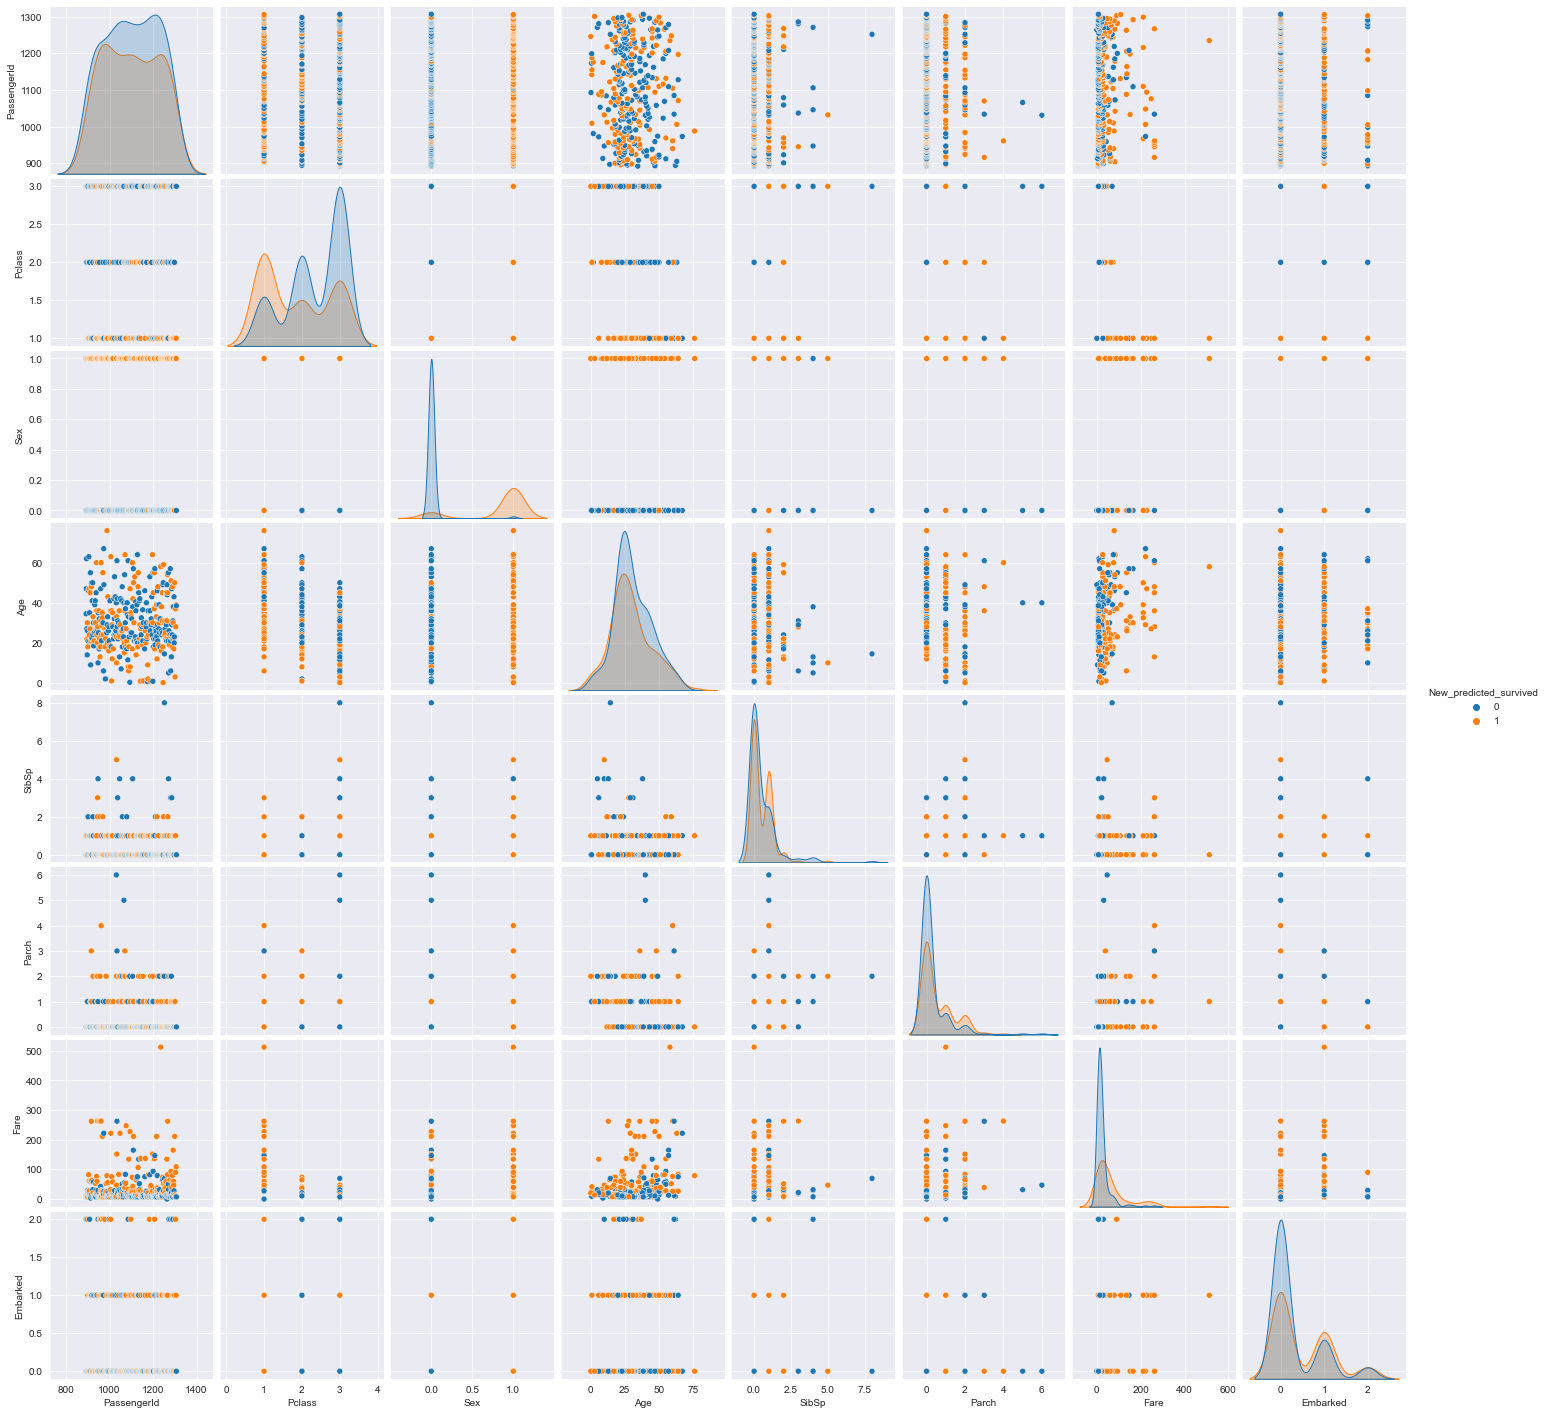

In [73]:
sns.pairplot(test_data, hue='New_predicted_survived')

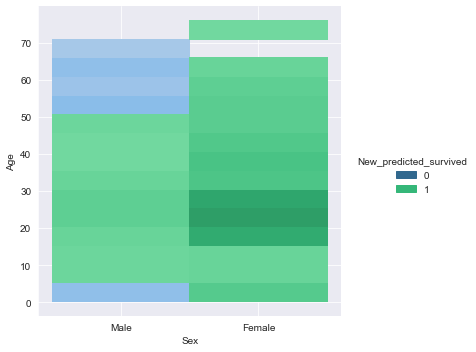

In [77]:
sns.displot(x='Sex',y='Age',data=test_data,hue='New_predicted_survived',palette='viridis')

In [75]:
test_data['Sex'] = test_data['Sex'].map({0:'Male',1:'Female'})

In [78]:
#WHAT I WANT TO DO NOW IS TAKE A DATASET, CLEAN IT, ACTUALLY SPLIT IT INTO TWO(SAY 70%,30%), 
#BUILD A MODEL BASED ON THE FIRST SPLIT, TEST AND EVALUATE
#THEN USE THE FINAL MODEL TO PREDICT FOR THE OTHER SPLIT DATA AND ACTUALLY COMPARE THE COLUMNS FOR THE TWO DATA

In [79]:
auto = pd.read_csv('Automobile_data.csv')
auto.head()

symboling normalized-losses         make fuel-type aspiration num-of-doors  \
0          3                 ?  alfa-romero       gas        std          two   
1          3                 ?  alfa-romero       gas        std          two   
2          1                 ?  alfa-romero       gas        std          two   
3          2               164         audi       gas        std         four   
4          2               164         audi       gas        std         four   

    body-style drive-wheels engine-location  wheel-base  ...  engine-size  \
0  convertible          rwd           front        88.6  ...          130   
1  convertible          rwd           front        88.6  ...          130   
2    hatchback          rwd           front        94.5  ...          152   
3        sedan          fwd           front        99.8  ...          109   
4        sedan          4wd           front        99.4  ...          136   

   fuel-system  bore  stroke compression-ratio horsepower  peak-rpm city-mpg  \
0         mpfi  3.47    2.68               9.0        111      5000       21   
1         mpfi  3.47    2.68               9.0        111      5000       21   
2         mpfi  2.68    3.47               9.0        154      5000       19   
3         mpfi  3.19     3.4              10.0        102      5500       24   
4         mpfi  3.19     3.4               8.0        115      5500       18   

  highway-mpg  price  
0          27  13495  
1          27  16500  
2          26  16500  
3          30  13950  
4          22  17450  

[5 rows x 26 columns]

In [80]:
auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [81]:
#DATA NOT LARGE ENOUGH

In [86]:
from sklearn import datasets

In [87]:
digits = datasets.load_digits()

In [1]:
digits.head()

NameError: name 'digits' is not defined

In [1]:
import pandas as pd

In [66]:
stroke = pd.read_csv('healthcare-dataset-stroke-data.csv')

In [67]:
stroke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [50]:
stroke.head(3)

id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   

   stroke  
0       1  
1       1  
2       1

In [9]:
stroke['gender'].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [45]:
stroke['hypertension'].value_counts()

0    4458
1     451
Name: hypertension, dtype: int64

In [ ]:
#Next 5 lines of code provide a mapping guide for our object data converting to numbers

In [72]:
stroke['ever_married'] = stroke['ever_married'].map({'No':0,'Yes':1})

In [73]:
stroke['work_type'] = stroke['work_type'].map({'Private':0,'Self-employed':1,'children':2,'Govt_job':3,
                                               'Never_worked':4})

In [74]:
stroke['Residence_type'] = stroke['Residence_type'].map({'Urban':0,'Rural':1})

In [75]:
stroke['smoking_status'] = stroke['smoking_status'].map({'never smoked':0,'formerly smoked':1,'smokes':2,'Unknown':3})

In [71]:
stroke['gender'] = stroke['gender'].map({'Male':0,'Female':1,'Other':2})

In [76]:
stroke.head()

gender   age  hypertension  heart_disease  ever_married  work_type  \
0       0  67.0             0              1             1          0   
2       0  80.0             0              1             1          0   
3       1  49.0             0              0             1          0   
4       1  79.0             1              0             1          1   
5       0  81.0             0              0             1          0   

   Residence_type  avg_glucose_level   bmi  smoking_status  stroke  
0               0             228.69  36.6               1       1  
2               1             105.92  32.5               0       1  
3               0             171.23  34.4               2       1  
4               1             174.12  24.0               0       1  
5               0             186.21  29.0               1       1

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

<AxesSubplot:>

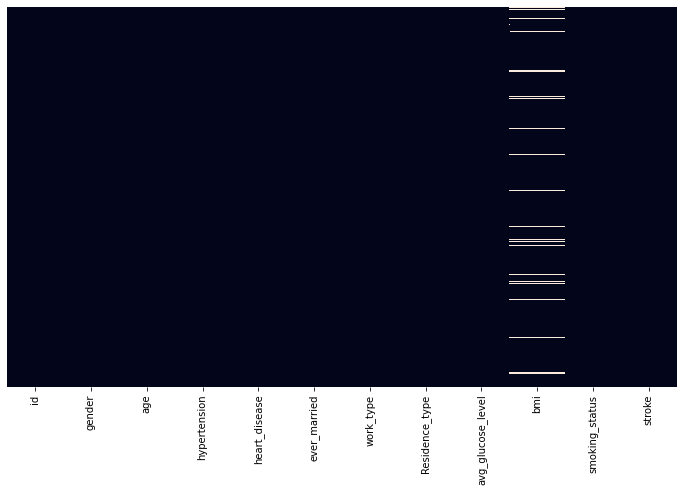

In [29]:
plt.figure(figsize=(12,7))
sns.heatmap(stroke.isnull(),yticklabels=False,cbar=False)

In [33]:
stroke['bmi'].describe()

count    4909.000000
mean       28.893237
std         7.854067
min        10.300000
25%        23.500000
50%        28.100000
75%        33.100000
max        97.600000
Name: bmi, dtype: float64

In [37]:
stroke[['age','bmi']]

age   bmi
0     67.0  36.6
1     61.0   NaN
2     80.0  32.5
3     49.0  34.4
4     79.0  24.0
...    ...   ...
5105  80.0   NaN
5106  81.0  40.0
5107  35.0  30.6
5108  51.0  25.6
5109  44.0  26.2

[5110 rows x 2 columns]

In [69]:
stroke.dropna(inplace=True, axis=0)

In [70]:
stroke.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4909 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4909 non-null   object 
 1   age                4909 non-null   float64
 2   hypertension       4909 non-null   int64  
 3   heart_disease      4909 non-null   int64  
 4   ever_married       4909 non-null   object 
 5   work_type          4909 non-null   object 
 6   Residence_type     4909 non-null   object 
 7   avg_glucose_level  4909 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     4909 non-null   object 
 10  stroke             4909 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 460.2+ KB


In [41]:
stroke['gender']

0         Male
2         Male
3       Female
4       Female
5         Male
         ...  
5104    Female
5106    Female
5107    Female
5108      Male
5109    Female
Name: gender, Length: 4909, dtype: object

In [52]:
stroke.head()

id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   
5  56669    Male  81.0             0              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   
5        Private          Urban             186.21  29.0  formerly smoked   

   stroke  
0       1  
2       1  
3       1  
4       1  
5       1

In [68]:
stroke.drop('id',axis=1,inplace=True)

In [77]:
stroke.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4909 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4909 non-null   int64  
 1   age                4909 non-null   float64
 2   hypertension       4909 non-null   int64  
 3   heart_disease      4909 non-null   int64  
 4   ever_married       4909 non-null   int64  
 5   work_type          4909 non-null   int64  
 6   Residence_type     4909 non-null   int64  
 7   avg_glucose_level  4909 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     4909 non-null   int64  
 10  stroke             4909 non-null   int64  
dtypes: float64(3), int64(8)
memory usage: 460.2 KB


In [78]:
stroke.head()

gender   age  hypertension  heart_disease  ever_married  work_type  \
0       0  67.0             0              1             1          0   
2       0  80.0             0              1             1          0   
3       1  49.0             0              0             1          0   
4       1  79.0             1              0             1          1   
5       0  81.0             0              0             1          0   

   Residence_type  avg_glucose_level   bmi  smoking_status  stroke  
0               0             228.69  36.6               1       1  
2               1             105.92  32.5               0       1  
3               0             171.23  34.4               2       1  
4               1             174.12  24.0               0       1  
5               0             186.21  29.0               1       1

In [82]:
stroke.reset_index(inplace=True)

In [83]:
stroke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4909 entries, 0 to 4908
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              4909 non-null   int64  
 1   gender             4909 non-null   int64  
 2   age                4909 non-null   float64
 3   hypertension       4909 non-null   int64  
 4   heart_disease      4909 non-null   int64  
 5   ever_married       4909 non-null   int64  
 6   work_type          4909 non-null   int64  
 7   Residence_type     4909 non-null   int64  
 8   avg_glucose_level  4909 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     4909 non-null   int64  
 11  stroke             4909 non-null   int64  
dtypes: float64(3), int64(9)
memory usage: 460.3 KB


In [84]:
del stroke['index']

In [85]:
stroke.head()

gender   age  hypertension  heart_disease  ever_married  work_type  \
0       0  67.0             0              1             1          0   
1       0  80.0             0              1             1          0   
2       1  49.0             0              0             1          0   
3       1  79.0             1              0             1          1   
4       0  81.0             0              0             1          0   

   Residence_type  avg_glucose_level   bmi  smoking_status  stroke  
0               0             228.69  36.6               1       1  
1               1             105.92  32.5               0       1  
2               0             171.23  34.4               2       1  
3               1             174.12  24.0               0       1  
4               0             186.21  29.0               1       1

In [86]:
#Now, we will split the data into 70:30, train a model on 70 and use 30 as the test

In [88]:
0.3 * 4909

1472.7

In [89]:
#the training data will be 3436 in number and the test data will be 1473 in number
#time to split the data in two

In [90]:
stroke_train = stroke.iloc[:3437]

In [91]:
stroke_train.head()

gender   age  hypertension  heart_disease  ever_married  work_type  \
0       0  67.0             0              1             1          0   
1       0  80.0             0              1             1          0   
2       1  49.0             0              0             1          0   
3       1  79.0             1              0             1          1   
4       0  81.0             0              0             1          0   

   Residence_type  avg_glucose_level   bmi  smoking_status  stroke  
0               0             228.69  36.6               1       1  
1               1             105.92  32.5               0       1  
2               0             171.23  34.4               2       1  
3               1             174.12  24.0               0       1  
4               0             186.21  29.0               1       1

In [92]:
stroke_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3437 entries, 0 to 3436
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             3437 non-null   int64  
 1   age                3437 non-null   float64
 2   hypertension       3437 non-null   int64  
 3   heart_disease      3437 non-null   int64  
 4   ever_married       3437 non-null   int64  
 5   work_type          3437 non-null   int64  
 6   Residence_type     3437 non-null   int64  
 7   avg_glucose_level  3437 non-null   float64
 8   bmi                3437 non-null   float64
 9   smoking_status     3437 non-null   int64  
 10  stroke             3437 non-null   int64  
dtypes: float64(3), int64(8)
memory usage: 295.5 KB


In [93]:
stroke_test = stroke.iloc[3437:]

In [94]:
stroke_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1472 entries, 3437 to 4908
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             1472 non-null   int64  
 1   age                1472 non-null   float64
 2   hypertension       1472 non-null   int64  
 3   heart_disease      1472 non-null   int64  
 4   ever_married       1472 non-null   int64  
 5   work_type          1472 non-null   int64  
 6   Residence_type     1472 non-null   int64  
 7   avg_glucose_level  1472 non-null   float64
 8   bmi                1472 non-null   float64
 9   smoking_status     1472 non-null   int64  
 10  stroke             1472 non-null   int64  
dtypes: float64(3), int64(8)
memory usage: 126.6 KB


In [95]:
#Now lets develop a KNN model from our stroke_train data
#We'll test and evaluate for prime results then deploy on stroke_test while removing the stroke col.
#We'll compare and contrast the correct column and predicted column to test our model to a T.

In [96]:
stroke_train.head()

gender   age  hypertension  heart_disease  ever_married  work_type  \
0       0  67.0             0              1             1          0   
1       0  80.0             0              1             1          0   
2       1  49.0             0              0             1          0   
3       1  79.0             1              0             1          1   
4       0  81.0             0              0             1          0   

   Residence_type  avg_glucose_level   bmi  smoking_status  stroke  
0               0             228.69  36.6               1       1  
1               1             105.92  32.5               0       1  
2               0             171.23  34.4               2       1  
3               1             174.12  24.0               0       1  
4               0             186.21  29.0               1       1

In [97]:
from sklearn.model_selection import train_test_split

In [98]:
X = stroke_train.drop('stroke',axis=1)

y = stroke_train['stroke']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [99]:
from sklearn.neighbors import KNeighborsClassifier

In [102]:
knn = KNeighborsClassifier(n_neighbors=5)

In [103]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [105]:
pred_1 = knn.predict(X_test)

In [106]:
pred_1

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [107]:
from sklearn.metrics import classification_report,confusion_matrix

In [108]:
print(classification_report(pred_1,y_test))

              precision    recall  f1-score   support

           0       0.98      0.93      0.96      1010
           1       0.06      0.18      0.09        22

    accuracy                           0.92      1032
   macro avg       0.52      0.56      0.52      1032
weighted avg       0.96      0.92      0.94      1032



In [109]:
print(confusion_matrix(pred_1,y_test))

[[944  66]
 [ 18   4]]


In [110]:
#Lets see from a plot if we can get a better accuracy from changing the n_neighbirs estimator

In [111]:
import numpy as np

In [115]:
error_rate = []

for i in range(1,60):
    
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i=knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

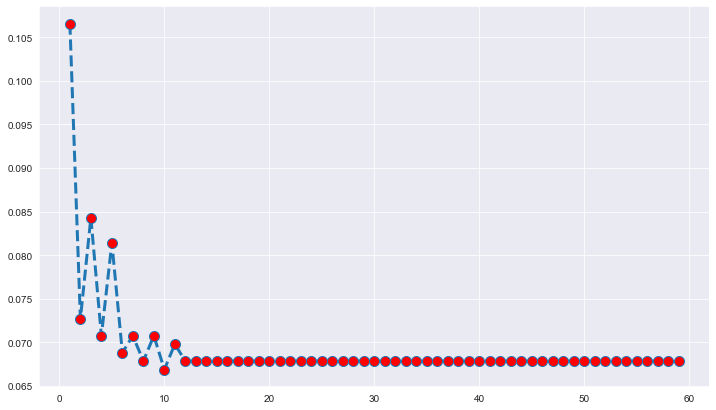

In [123]:
sns.set_style('darkgrid')
plt.figure(figsize=(12,7))
plt.plot(range(1,60),error_rate,ls='--',lw=3,marker='o',markerfacecolor='r',markersize=10)

In [125]:
#from our plot, 10 is obviously the best k-value

In [126]:
knn = KNeighborsClassifier(n_neighbors=10)

In [127]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=10)

In [128]:
pred_2 = knn.predict(X_test)

In [129]:
print(classification_report(pred_2,y_test))

              precision    recall  f1-score   support

           0       1.00      0.93      0.97      1031
           1       0.01      1.00      0.03         1

    accuracy                           0.93      1032
   macro avg       0.51      0.97      0.50      1032
weighted avg       1.00      0.93      0.96      1032



In [130]:
print(confusion_matrix(pred_2,y_test))

[[962  69]
 [  0   1]]


In [131]:
#Now we've gotten a higher accuracy, let's deploy on our half of the split data and compare to see accuracy

In [133]:
stroke_test_og_col = stroke_test['stroke']

In [135]:
stroke_test.drop('stroke',axis=1,inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [136]:
stroke_test

gender   age  hypertension  heart_disease  ever_married  work_type  \
3437       0  51.0             0              0             1          0   
3438       0  69.0             1              0             1          1   
3439       1  75.0             1              0             1          1   
3440       1  27.0             0              0             0          0   
3441       1  49.0             0              0             0          3   
...      ...   ...           ...            ...           ...        ...   
4904       1  13.0             0              0             0          2   
4905       1  81.0             0              0             1          1   
4906       1  35.0             0              0             1          1   
4907       0  51.0             0              0             1          0   
4908       1  44.0             0              0             1          3   

      Residence_type  avg_glucose_level   bmi  smoking_status  
3437               1             112.79  27.2               0  
3438               1             236.79  35.7               1  
3439               1             219.82  29.5               1  
3440               0              82.05  21.0               3  
3441               1             104.08  26.6               0  
...              ...                ...   ...             ...  
4904               1             103.08  18.6               3  
4905               0             125.20  40.0               0  
4906               1              82.99  30.6               0  
4907               1             166.29  25.6               1  
4908               0              85.28  26.2               3  

[1472 rows x 10 columns]

In [137]:
pred_3 = knn.predict(stroke_test)

In [138]:
pred_3

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [141]:
stroke_test['actual_stroke_value'] = stroke_test_og_col

<ipython-input-141-a2a5746fbe5c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stroke_test['actual_stroke_value'] = stroke_test_og_col


In [143]:
stroke_test['predicted_stroke_value'] = pred_3

<ipython-input-143-81dccb343ba1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stroke_test['predicted_stroke_value'] = pred_3


In [144]:
stroke_test

gender   age  hypertension  heart_disease  ever_married  work_type  \
3437       0  51.0             0              0             1          0   
3438       0  69.0             1              0             1          1   
3439       1  75.0             1              0             1          1   
3440       1  27.0             0              0             0          0   
3441       1  49.0             0              0             0          3   
...      ...   ...           ...            ...           ...        ...   
4904       1  13.0             0              0             0          2   
4905       1  81.0             0              0             1          1   
4906       1  35.0             0              0             1          1   
4907       0  51.0             0              0             1          0   
4908       1  44.0             0              0             1          3   

      Residence_type  avg_glucose_level   bmi  smoking_status  \
3437               1             112.79  27.2               0   
3438               1             236.79  35.7               1   
3439               1             219.82  29.5               1   
3440               0              82.05  21.0               3   
3441               1             104.08  26.6               0   
...              ...                ...   ...             ...   
4904               1             103.08  18.6               3   
4905               0             125.20  40.0               0   
4906               1              82.99  30.6               0   
4907               1             166.29  25.6               1   
4908               0              85.28  26.2               3   

      actual_stroke_value  predicted_stroke_value  
3437                    0                       0  
3438                    0                       0  
3439                    0                       0  
3440                    0                       0  
3441                    0                       0  
...                   ...                     ...  
4904                    0                       0  
4905                    0                       0  
4906                    0                       0  
4907                    0                       0  
4908                    0                       0  

[1472 rows x 12 columns]

In [145]:
stroke_test[['actual_stroke_value','predicted_stroke_value']]

actual_stroke_value  predicted_stroke_value
3437                    0                       0
3438                    0                       0
3439                    0                       0
3440                    0                       0
3441                    0                       0
...                   ...                     ...
4904                    0                       0
4905                    0                       0
4906                    0                       0
4907                    0                       0
4908                    0                       0

[1472 rows x 2 columns]

In [152]:
stroke_test

gender    age  hypertension  heart_disease  ever_married  work_type  \
3437       0  51.00             0              0             1          0   
3438       0  69.00             1              0             1          1   
3439       1  75.00             1              0             1          1   
3440       1  27.00             0              0             0          0   
3441       1  49.00             0              0             0          3   
3442       0  82.00             0              0             0          1   
3443       1  36.00             0              0             1          0   
3444       0  45.00             1              0             1          1   
3445       1  64.00             0              0             1          0   
3446       0  32.00             0              0             0          0   
3447       1  15.00             0              0             0          0   
3448       1   1.64             0              0             0          2   
3449       0  34.00             0              0             1          0   
3450       0  17.00             0              0             0          0   
3451       1  76.00             1              0             1          1   
3452       0  61.00             0              0             1          1   
3453       0  30.00             0              0             1          0   
3454       1  18.00             0              0             0          0   
3455       0  48.00             0              0             1          0   
3456       0   0.16             0              0             0          2   
3457       1   4.00             0              0             0          2   
3458       0  38.00             0              0             1          0   
3459       1  27.00             0              0             1          0   
3460       1  50.00             0              0             0          0   
3461       0  19.00             0              0             0          0   
3462       0   8.00             0              0             0          2   
3463       0  78.00             0              1             1          1   
3464       0   0.80             0              0             0          2   
3465       1  53.00             1              0             1          0   
3466       1  73.00             1              0             1          0   
3467       0  58.00             0              0             1          3   
3468       1  62.00             0              0             1          0   
3469       1  78.00             0              0             0          1   
3470       1  51.00             0              0             1          0   
3471       0  78.00             0              0             1          3   
3472       1  40.00             1              0             1          0   
3473       1  35.00             0              0             0          0   
3474       0  82.00             0              0             1          0   
3475       1  46.00             0              0             1          1   
3476       1  51.00             1              0             1          0   
3477       1  53.00             0              0             1          3   
3478       0  55.00             0              1             1          0   
3479       1  43.00             0              0             1          3   
3480       0  81.00             0              0             1          0   
3481       0  12.00             0              0             0          2   
3482       1  20.00             0              0             0          0   
3483       1  53.00             0              0             1          0   
3484       1   1.32             0              0             0          2   
3485       1  22.00             0              0             0          0   
3486       1  75.00             0              0             1          1   
3487       1  66.00             0              0             1          1   
34

In [151]:
pd.set_option("display.max_rows", None, "display.max_columns", None)

In [153]:
stroke

gender    age  hypertension  heart_disease  ever_married  work_type  \
0          0  67.00             0              1             1          0   
1          0  80.00             0              1             1          0   
2          1  49.00             0              0             1          0   
3          1  79.00             1              0             1          1   
4          0  81.00             0              0             1          0   
5          0  74.00             1              1             1          0   
6          1  69.00             0              0             0          0   
7          1  78.00             0              0             1          0   
8          1  81.00             1              0             1          0   
9          1  61.00             0              1             1          3   
10         1  54.00             0              0             1          0   
11         1  79.00             0              1             1          0   
12         1  50.00             1              0             1          1   
13         0  64.00             0              1             1          0   
14         0  75.00             1              0             1          0   
15         1  60.00             0              0             0          0   
16         1  71.00             0              0             1          3   
17         1  52.00             1              0             1          1   
18         1  79.00             0              0             1          1   
19         0  82.00             0              1             1          0   
20         0  71.00             0              0             1          0   
21         0  80.00             0              0             1          1   
22         1  65.00             0              0             1          0   
23         0  69.00             0              1             1          1   
24         0  57.00             1              0             1          0   
25         0  42.00             0              0             1          0   
26         1  82.00             1              0             1          1   
27         0  80.00             0              1             1          1   
28         0  48.00             0              0             0          3   
29         1  82.00             1              1             0          0   
30         0  74.00             0              0             1          0   
31         1  72.00             1              0             1          0   
32         0  58.00             0              0             0          0   
33         1  49.00             0              0             1          0   
34         0  78.00             0              0             1          0   
35         0  54.00             0              0             1          0   
36         0  82.00             0              1             1          0   
37         0  60.00             1              0             1          3   
38         0  76.00             1              0             1          0   
39         1  58.00             0              0             1          0   
40         0  81.00             0              0             1          1   
41         1  39.00             1              0             1          0   
42         1  79.00             0              1             1          0   
43         1  77.00             1              0             1          1   
44         0  63.00             0              1             1          0   
45         1  82.00             0              0             1          0   
46         0  73.00             1              0             1          1   
47         1  54.00             1              0             1          3   
48         1  56.00             0              0             1          0   
49         1  80.00             1              0             1          0   
50         1  67.00             1              0             1          1   
51

In [154]:
re_stroke = pd.read_csv('healthcare-dataset-stroke-data.csv')

In [156]:
re_stroke

id  gender    age  hypertension  heart_disease ever_married  \
0      9046    Male  67.00             0              1          Yes   
1     51676  Female  61.00             0              0          Yes   
2     31112    Male  80.00             0              1          Yes   
3     60182  Female  49.00             0              0          Yes   
4      1665  Female  79.00             1              0          Yes   
5     56669    Male  81.00             0              0          Yes   
6     53882    Male  74.00             1              1          Yes   
7     10434  Female  69.00             0              0           No   
8     27419  Female  59.00             0              0          Yes   
9     60491  Female  78.00             0              0          Yes   
10    12109  Female  81.00             1              0          Yes   
11    12095  Female  61.00             0              1          Yes   
12    12175  Female  54.00             0              0          Yes   
13     8213    Male  78.00             0              1          Yes   
14     5317  Female  79.00             0              1          Yes   
15    58202  Female  50.00             1              0          Yes   
16    56112    Male  64.00             0              1          Yes   
17    34120    Male  75.00             1              0          Yes   
18    27458  Female  60.00             0              0           No   
19    25226    Male  57.00             0              1           No   
20    70630  Female  71.00             0              0          Yes   
21    13861  Female  52.00             1              0          Yes   
22    68794  Female  79.00             0              0          Yes   
23    64778    Male  82.00             0              1          Yes   
24     4219    Male  71.00             0              0          Yes   
25    70822    Male  80.00             0              0          Yes   
26    38047  Female  65.00             0              0          Yes   
27    61843    Male  58.00             0              0          Yes   
28    54827    Male  69.00             0              1          Yes   
29    69160    Male  59.00             0              0          Yes   
30    43717    Male  57.00             1              0          Yes   
31    33879    Male  42.00             0              0          Yes   
32    39373  Female  82.00             1              0          Yes   
33    54401    Male  80.00             0              1          Yes   
34    14248    Male  48.00             0              0           No   
35      712  Female  82.00             1              1           No   
36    47269    Male  74.00             0              0          Yes   
37    24977  Female  72.00             1              0          Yes   
38    47306    Male  58.00             0              0           No   
39    62602  Female  49.00             0              0          Yes   
40     4651    Male  78.00             0              0          Yes   
41     1261    Male  54.00             0              0          Yes   
42    61960    Male  82.00             0              1          Yes   
43     1845  Female  63.00             0              0          Yes   
44     7937    Male  60.00             1              0          Yes   
45    19824    Male  76.00             1              0          Yes   
46    37937  Female  75.00             0              1           No   
47    47472  Female  58.00             0              0          Yes   
48    35626    Male  81.00             0              0          Yes   
49    36338  Female  39.00             1              0          Yes   
50    18587  Female  76.00             0              0           No   
51    15102    Male  78.00             1              0          Yes   
52    59190  Female  79.00             0              1          Yes   
53    47167  Female  77.00             1              0          Yes   
54     8752  Female  63.00             0         